# Case_study_5_1

The goal of this case study is to check the performance of algorithms BFGS compared with standard Gradient and Newton solutions for the Ridge problem.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
from local.lib.Generation import scenarios_regression
from local.lib.utils import solver_cvx,  eval_loss, plot_surface, grad_FOM, grad_SOM, BFGS
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#!pip install cvxpy

In [ ]:
import cvxpy as cp

In [2]:
# Loading scenarios
# ===========================
scenario=2
data_reg, set_up =scenarios_regression(scenario)

# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.pnorm(X @ w - Y, p=2)**2
reg_L2 = lambda w: cp.pnorm(w, p=2)**2

loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)
grad_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@(X @ w - Y) + lambd * w
Hess_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@X + lambd * np.eye(X.shape[1])



# Different ways to solve theoreticaly the LS
# =========================================
# Solution of the empirical risk using CVX

w_L2_cvx=solver_cvx(set_up,loss_LS_L2);

Xtrain = set_up['Xtrain'][:,:set_up['d']+1]
w_opt=np.linalg.inv(2/set_up['Niter_train']*Xtrain.T@Xtrain + set_up['Lambda']*np.eye(set_up['d']+1))@((2/set_up['Niter_train'])*Xtrain.T)@set_up['ytrain'][:,0];

w = cp.Variable(w_L2_cvx.shape[0])
w.value = w_L2_cvx
loss_opt=loss_LS_L2(set_up['Niter_train'],set_up['Xtrain'][:,0:set_up['d']+1],set_up['ytrain'][:,0],w_L2_cvx,set_up['Lambda']).value
print(w_L2_cvx, w_opt)

          
# Gradient descent
out_gd = grad_FOM(set_up,grad_LS_L2)
loss_grad=eval_loss(out_gd,set_up,loss_LS_L2)

# Newton algorithm
out_hess =grad_SOM(set_up,grad_LS_L2,Hess_LS_L2)
loss_hess=eval_loss(out_hess,set_up,loss_LS_L2)
          
# BFGS algorithm
out_BFGS =BFGS(set_up,grad_LS_L2)
loss_BFGS=eval_loss(out_BFGS,set_up,loss_LS_L2)

[ 0.20320631  0.09499544  0.30808703  0.45628991 -0.18186961 -0.35815914
  0.65636975  0.09684322  0.1747476  -0.4130014  -0.03037348] [ 0.20317058  0.09497115  0.30806871  0.45626777 -0.18191048 -0.3581913
  0.65633902  0.09683521  0.17471094 -0.41305082 -0.03008565]


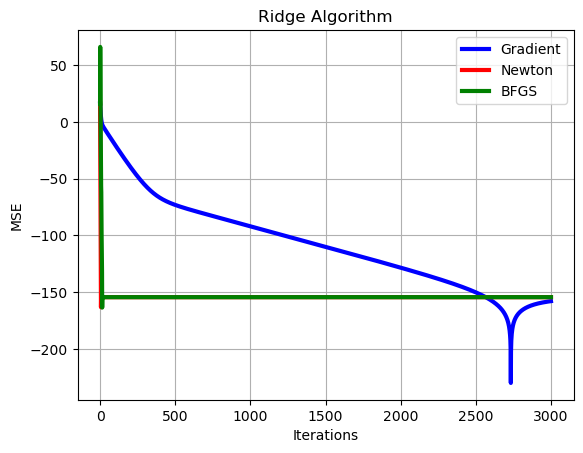

In [3]:
# Plot of learning curves
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_grad-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)),color='b', linewidth = 3)
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_hess-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)),color='r', linewidth = 3)
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_BFGS-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)),color='g', linewidth = 3),
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend(['Gradient','Newton','BFGS'])
plt.title('Ridge Algorithm')
plt.show()

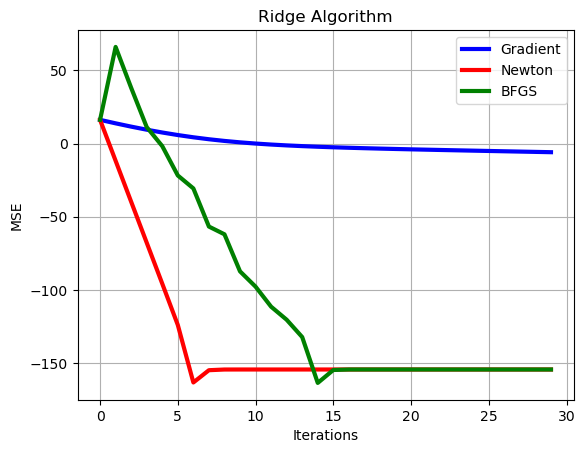

In [4]:
# Let's make a zoom
# Plot of learning curves
show=30
plt.plot(np.arange(0,show),10*np.log10(np.sum((loss_grad[0,:show]-loss_opt*np.ones((1,show)))**2,axis=0)),color='b', linewidth = 3)
plt.plot(np.arange(0,show),10*np.log10(np.sum((loss_hess[0,:show]-loss_opt*np.ones((1,show)))**2,axis=0)),color='r', linewidth = 3)
plt.plot(np.arange(0,show),10*np.log10(np.sum((loss_BFGS[0,:show]-loss_opt*np.ones((1,show)))**2,axis=0)),color='g', linewidth = 3),
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend(['Gradient','Newton','BFGS'])
plt.title('Ridge Algorithm')
plt.show()